In [ ]:
!gdown 1_8Rbq7o1TGeiBn6rjipDYj-iLNU1NX-o

Downloading...
From: https://drive.google.com/uc?id=1_8Rbq7o1TGeiBn6rjipDYj-iLNU1NX-o
To: /content/kaggle.json
100% 71.0/71.0 [00:00<00:00, 363kB/s]


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle

In [ ]:
#!/bin/bash
!kaggle datasets download andreadiubaldo/wavefake-test

Dataset URL: https://www.kaggle.com/datasets/andreadiubaldo/wavefake-test
License(s): unknown
100% 26.9G/26.9G [04:32<00:00, 167MB/s]
100% 26.9G/26.9G [04:33<00:00, 106MB/s]


In [ ]:
#!/bin/bash
!kaggle datasets download mathurinache/the-lj-speech-dataset

Dataset URL: https://www.kaggle.com/datasets/mathurinache/the-lj-speech-dataset
License(s): CC0-1.0
100% 2.99G/2.99G [00:17<00:00, 190MB/s]
100% 2.99G/2.99G [00:17<00:00, 184MB/s]


In [ ]:
!unzip /content/wavefake-test.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0111.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0112.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0113.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0114.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0115.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0116.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0117.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0118.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0119.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0120.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0121.wav  
  inflating: /content/data/generated_audio/ljspeech_waveglow/LJ030-0122.wav  
  inflating: 

In [ ]:
!unzip /content/the-lj-speech-dataset.zip -d /content/real_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0111.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0112.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0113.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0114.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0115.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0116.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0117.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0118.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0119.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0120.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0121.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0122.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0123.wav  
  inflating: /content/real_data/LJSpeech-1.1/wavs/LJ030-0124.wav  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Reshape,MaxPooling2D, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
import os

real_root_dir = '/content/real_data/LJSpeech-1.1/wavs'
fake_root_dir = '/content/data/generated_audio/ljspeech_melgan'

In [ ]:
def extract_features(fake_root_dir, real_root_dir, max_length=500):
    features = []
    labels = []

    for file in os.listdir(fake_root_dir):
        file_path = os.path.join(fake_root_dir, file)
        try:
            # Load audio file
            audio, _ = librosa.load(file_path, sr=16000)
            # Extract features (example: using Mel-Frequency Cepstral Coefficients)
            mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
            # Pad or trim the feature array to a fixed length
            if mfccs.shape[1] < max_length:
                mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
            else:
                mfccs = mfccs[:, :max_length]
            features.append(mfccs)
            # Assign label
            labels.append(1)  # 1 for fake
        except Exception as e:
            print(f"Error encountered while parsing file: {file_path}")
            continue

    for file in os.listdir(real_root_dir):
        file_path = os.path.join(real_root_dir, file)
        try:
            # Load audio file
            audio, _ = librosa.load(file_path, sr=16000)
            # Extract features (example: using Mel-Frequency Cepstral Coefficients)
            mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
            # Pad or trim the feature array to a fixed length
            if mfccs.shape[1] < max_length:
                mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
            else:
                mfccs = mfccs[:, :max_length]
            features.append(mfccs)
            # Assign label
            labels.append(0)  # 0 for real
        except Exception as e:
            print(f"Error encountered while parsing file: {file_path}")
            continue
    return np.array(features), np.array(labels)

# Example usage

x, y = extract_features(fake_root_dir, real_root_dir)

print("Features shape:", x.shape)
print("Labels shape:", y.shape)

Features shape: (26200, 40, 500)
Labels shape: (26200,)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=None)

# **Model 1**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(40, 500, 1)),  # Define input shape here
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 38, 498, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 249, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 247, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 123, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 62976)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics  = ['accuracy'])

In [ ]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 16, validation_data = [xtest,ytest])

Epoch 1/10
1310/1310 [==============================] - 94s 71ms/step - loss: 0.7803 - accuracy: 0.5086 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 2/10
1310/1310 [==============================] - 90s 68ms/step - loss: 0.6772 - accuracy: 0.5487 - val_loss: 0.5668 - val_accuracy: 0.6954
Epoch 3/10
1310/1310 [==============================] - 88s 67ms/step - loss: 0.5138 - accuracy: 0.7490 - val_loss: 0.4119 - val_accuracy: 0.8219
Epoch 4/10
1310/1310 [==============================] - 87s 66ms/step - loss: 0.4012 - accuracy: 0.8221 - val_loss: 0.3880 - val_accuracy: 0.8265
Epoch 5/10
1310/1310 [==============================] - 86s 66ms/step - loss: 0.3427 - accuracy: 0.8534 - val_loss: 0.3301 - val_accuracy: 0.8552
Epoch 6/10
1310/1310 [==============================] - 86s 66ms/step - loss: 0.2987 - accuracy: 0.8764 - val_loss: 0.2619 - val_accuracy: 0.8952
Epoch 7/10
1310/1310 [==============================] - 87s 67ms/step - loss: 0.2615 - accuracy: 0.8953 - val_loss: 0.2645 -

In [ ]:
model.save('/content/audio_classifier_model1.h5')
print("\nModel saved as 'audio_classifier_model1.h5'.")


Model saved as 'audio_classifier_model1.h5'.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/MyDrive/DEEP_FAKE_DETECTION/audio_classifier_model1.h5')
print("\nModel saved as 'audio_classifier2.h5'.")


Model saved as 'audio_classifier2.h5'.


In [ ]:
loss,accuracy = model.evaluate(xtest,ytest)

164/164 [==============================] - 5s 31ms/step - loss: 0.2839 - accuracy: 0.8859


# **Second Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, GlobalAveragePooling2D

model2 = Sequential([
    Input(shape=(40, 500, 1)),
    Conv2D(32, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, kernel_size=(3, 3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),
    MaxPooling2D(pool_size=(2, 2)),

    # Global Average Pooling instead of Flatten
    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Output layer for 2 classes: bonafide, spoof
])

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 40, 500, 32)       320       
                                                                 
 batch_normalization_16 (Ba  (None, 40, 500, 32)       128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 40, 500, 32)       0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 20, 250, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 250, 64)       18496     
                                                                 
 batch_normalization_17 (Ba  (None, 20, 250, 64)      

In [ ]:
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics  = ['accuracy'])

In [ ]:
history = model2.fit(xtrain, ytrain, epochs = 10, batch_size = 16, validation_data = [xtest,ytest])

Epoch 1/10
1310/1310 [==============================] - 184s 139ms/step - loss: 0.2480 - accuracy: 0.8911 - val_loss: 2.9692 - val_accuracy: 0.5019
Epoch 2/10
1310/1310 [==============================] - 181s 138ms/step - loss: 0.1246 - accuracy: 0.9531 - val_loss: 0.9363 - val_accuracy: 0.6067
Epoch 3/10
1310/1310 [==============================] - 179s 136ms/step - loss: 0.0882 - accuracy: 0.9685 - val_loss: 0.0369 - val_accuracy: 0.9868
Epoch 4/10
1310/1310 [==============================] - 181s 138ms/step - loss: 0.0763 - accuracy: 0.9727 - val_loss: 3.0782 - val_accuracy: 0.5510
Epoch 5/10
1310/1310 [==============================] - 180s 138ms/step - loss: 0.0637 - accuracy: 0.9770 - val_loss: 0.1185 - val_accuracy: 0.9536
Epoch 6/10
1310/1310 [==============================] - 177s 135ms/step - loss: 0.0550 - accuracy: 0.9796 - val_loss: 1.2832 - val_accuracy: 0.6134
Epoch 7/10
1310/1310 [==============================] - 176s 134ms/step - loss: 0.0541 - accuracy: 0.9807 - val_

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train model
history = model2.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    batch_size=16,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
1310/1310 [==============================] - 184s 139ms/step - loss: 0.2969 - accuracy: 0.8622 - val_loss: 0.1257 - val_accuracy: 0.9616 - lr: 0.0010
Epoch 2/10
1310/1310 [==============================] - 178s 136ms/step - loss: 0.1343 - accuracy: 0.9485 - val_loss: 0.1811 - val_accuracy: 0.9408 - lr: 0.0010
Epoch 3/10
1310/1310 [==============================] - 176s 134ms/step - loss: 0.0985 - accuracy: 0.9635 - val_loss: 0.0901 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 4/10
1310/1310 [==============================] - 178s 136ms/step - loss: 0.0772 - accuracy: 0.9715 - val_loss: 0.1561 - val_accuracy: 0.9372 - lr: 0.0010
Epoch 5/10
1310/1310 [==============================] - 180s 137ms/step - loss: 0.0696 - accuracy: 0.9736 - val_loss: 0.1059 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 6/10
1310/1310 [==============================] - 179s 137ms/step - loss: 0.0621 - accuracy: 0.9771 - val_loss: 0.0485 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 7/10
1310/1310 [============

In [ ]:
model2.save('/content/audio_classifier_model2_best.h5')
print("\nModel saved as 'audio_classifier_model2.h5'.")


Model saved as 'audio_classifier_model2.h5'.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save('/content/drive/MyDrive/DEEP_FAKE_DETECTION/audio_classifier_model2_best.h5')
print("\nModel saved as 'audio_classifier2.h5'.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Model saved as 'audio_classifier2.h5'.


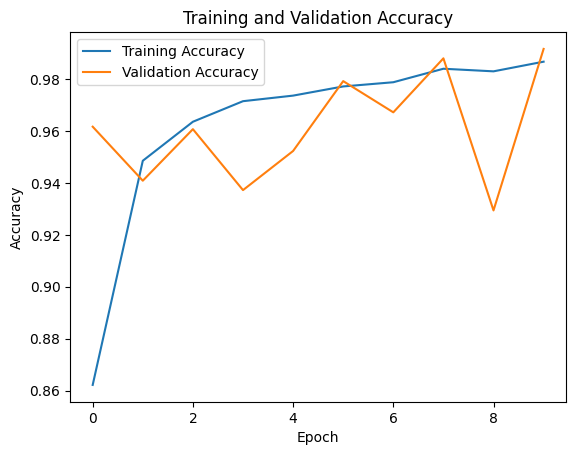

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

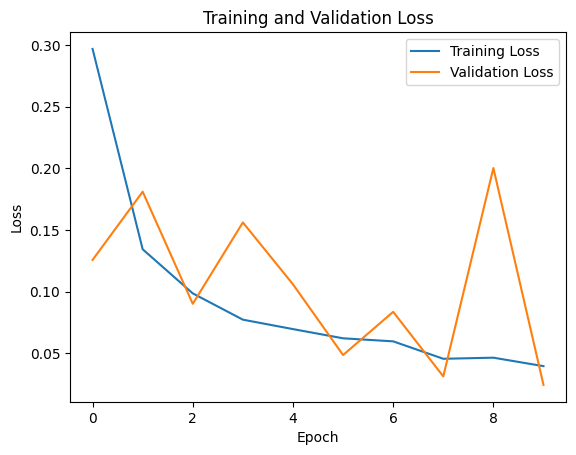

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss,accuracy = model2.evaluate(xtest,ytest)

164/164 [==============================] - 10s 63ms/step - loss: 0.0243 - accuracy: 0.9916


In [ ]:
import os
import random
import numpy as np
import librosa
import soundfile as sf
from keras.models import load_model  # Assuming you have your model saved and need to load it

def extract_features_from_audio(file_path, max_length=500):
    try:
        audio, _ = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
        if mfccs.shape[1] < max_length:
            mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
        else:
            mfccs = mfccs[:, :max_length]
        return mfccs
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}")
        return None

def save_random_audio_files_and_test_model(model, model_name):
    # Select a random file from the real directory
    real_files = os.listdir(real_root_dir)
    random_real_file = random.choice(real_files)
    real_file_path = os.path.join(real_root_dir, random_real_file)

    # Load and save the real audio file
    real_audio, sr = librosa.load(real_file_path, sr=16000)
    sf.write(f'test_real_{model_name}.wav', real_audio, sr)

    # Select a random file from the fake directory
    fake_files = os.listdir(fake_root_dir)
    random_fake_file = random.choice(fake_files)
    fake_file_path = os.path.join(fake_root_dir, random_fake_file)

    # Load and save the fake audio file
    fake_audio, sr = librosa.load(fake_file_path, sr=16000)
    sf.write(f'test_fake_{model_name}.wav', fake_audio, sr)

    print(f"Saved random real audio as 'test_real_{model_name}.wav' from: {real_file_path}")
    print(f"Saved random fake audio as 'test_fake_{model_name}.wav' from: {fake_file_path}")

    # Extract features for both files
    real_features = extract_features_from_audio(real_file_path)
    fake_features = extract_features_from_audio(fake_file_path)

    if real_features is not None and fake_features is not None:
        # Reshape features for the model
        real_features = real_features.reshape(1, real_features.shape[0], real_features.shape[1], 1)  # Add batch and channel dimensions
        fake_features = fake_features.reshape(1, fake_features.shape[0], fake_features.shape[1], 1)

        # Make predictions
        real_prediction = model.predict(real_features)
        fake_prediction = model.predict(fake_features)

        print(f"Prediction for real audio: {real_prediction}")
        print(f"Prediction for fake audio: {fake_prediction}")
        print(f"Predicted class for real audio: {'Fake' if real_prediction[0] > 0.5 else 'Real'}")
        print(f"Predicted class for fake audio: {'Fake' if fake_prediction[0] > 0.5 else 'Real'}")
    else:
        print("Error extracting features from one or both audio files.")

# Load your models (assuming they’re saved as 'model1.h5' and 'model2.h5')
# model1 = load_model('model1.h5')
# model2 = load_model('model2.h5')

# Call the function to save random audio files and test the models
print("Testing Model 1 : \n")
save_random_audio_files_and_test_model(model, "model")

print("\n\nTesting Model 2 : \n")
save_random_audio_files_and_test_model(model2, "model2")


Testing Model 1 : 

Saved random real audio as 'test_real_model.wav' from: /content/real_data/LJSpeech-1.1/wavs/LJ015-0116.wav
Saved random fake audio as 'test_fake_model.wav' from: /content/data/generated_audio/ljspeech_melgan/LJ008-0211_gen.wav
1/1 [==============================] - 0s 31ms/step
Prediction for real audio: [[0.02078713]]
Prediction for fake audio: [[0.9986427]]
Predicted class for real audio: Real
Predicted class for fake audio: Fake


Testing Model 2 : 

Saved random real audio as 'test_real_model2.wav' from: /content/real_data/LJSpeech-1.1/wavs/LJ049-0117.wav
Saved random fake audio as 'test_fake_model2.wav' from: /content/data/generated_audio/ljspeech_melgan/LJ002-0280_gen.wav
1/1 [==============================] - 0s 32ms/step
Prediction for real audio: [[0.00011826]]
Prediction for fake audio: [[0.99987876]]
Predicted class for real audio: Real
Predicted class for fake audio: Fake


# **Download Model h5 file**

In [ ]:
!gdown 1--QxtTzb0SOHEq9ehvGE5KjzFNTm35Ow

#MODEL 1

Downloading...
From: https://drive.google.com/uc?id=1--QxtTzb0SOHEq9ehvGE5KjzFNTm35Ow
To: /content/audio_classifier_model1.h5
100% 97.0M/97.0M [00:00<00:00, 183MB/s]


In [ ]:
!gdown 1-3MWe_-a8KPCD6W3CoEhDrgwlRmqsDub

#MODEL 2